In [41]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize": (20, 15)})
sns.set_style("whitegrid")

In [42]:
# Import Files
df_campaign = pd.read_csv('/Users/apurba60/desktop/campaign.csv', error_bad_lines= False)
df_category = pd.read_csv('/Users/apurba60/desktop/category.csv', error_bad_lines= False)
df_subcategory = pd.read_csv('/Users/apurba60/desktop/subcategory.csv', error_bad_lines= False)

b'Skipping line 113: expected 11 fields, saw 12\nSkipping line 391: expected 11 fields, saw 12\nSkipping line 913: expected 11 fields, saw 12\nSkipping line 1141: expected 11 fields, saw 12\nSkipping line 1446: expected 11 fields, saw 12\nSkipping line 1829: expected 11 fields, saw 12\nSkipping line 1942: expected 11 fields, saw 13\nSkipping line 1959: expected 11 fields, saw 12\nSkipping line 2012: expected 11 fields, saw 12\nSkipping line 2582: expected 11 fields, saw 12\nSkipping line 2589: expected 11 fields, saw 12\nSkipping line 3446: expected 11 fields, saw 12\nSkipping line 3638: expected 11 fields, saw 12\nSkipping line 4013: expected 11 fields, saw 12\nSkipping line 4106: expected 11 fields, saw 12\nSkipping line 4241: expected 11 fields, saw 12\nSkipping line 4643: expected 11 fields, saw 12\nSkipping line 4645: expected 11 fields, saw 12\nSkipping line 5126: expected 11 fields, saw 12\nSkipping line 5435: expected 11 fields, saw 12\nSkipping line 5471: expected 11 fields, s

### Analysis

In [43]:
df_campaign.head()

,id,name,sub_category_id,country_id,currency_id,launched,deadline,goal,pledged,backers,outcome
0,1,Ragdolls,23,2,2.0,2013-04-25 00:00:00,2013-05-25 00:00:00,15000.00,20.00,3.0,failed
1,2,One To Ten,47,1,1.0,2015-11-16 00:00:00,2015-12-16 00:00:00,223.68,413.81,23.0,successful
2,3,Future Gun - A short film about kids and advan...,24,2,2.0,2013-08-28 00:00:00,2013-09-27 00:00:00,5000.00,1497.00,28.0,failed
3,4,Fourth Wave Apparel—Vintage Fashion for the Mo...,52,2,2.0,2014-07-22 00:00:00,2014-08-21 00:00:00,6000.00,8795.00,218.0,successful
4,5,The Rich Lifestyle,9,2,2.0,2016-08-24 00:00:00,2016-09-28 00:00:00,2000000.00,2.00,2.0,failed


In [44]:
df_category.head()

,id,name
0,1,Publishing
1,2,Film & Video
2,3,Music
3,4,Food
4,5,Design


In [45]:
df_subcategory

,id,name,category_id
0,1,Poetry,1
1,2,Narrative Film,2
2,3,Music,3
3,4,Film & Video,2
4,5,Restaurants,4
...,...,...,...
154,155,Literary Journals,1
155,156,Taxidermy,6
156,157,Literary Spaces,1
157,158,Chiptune,3


In [46]:
df_campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14954 entries, 0 to 14953
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14954 non-null  int64  
 1   name             14954 non-null  object 
 2   sub_category_id  14954 non-null  object 
 3   country_id       14954 non-null  int64  
 4   currency_id      14954 non-null  float64
 5   launched         14954 non-null  object 
 6   deadline         14954 non-null  object 
 7   goal             14948 non-null  float64
 8   pledged          14948 non-null  float64
 9   backers          14948 non-null  float64
 10  outcome          14948 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ MB


In [47]:
df_campaign["outcome"].unique()

array(['failed', 'successful', 'canceled', 'suspended', 'undefined',
       'live', nan], dtype=object)

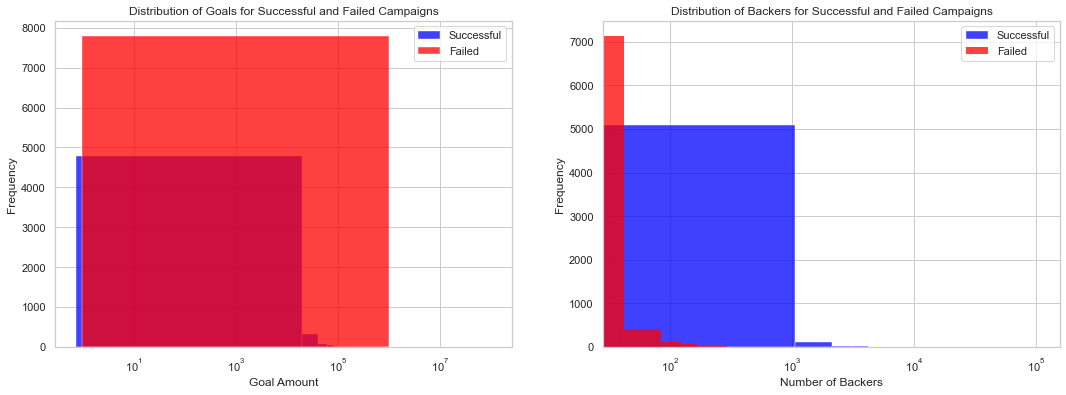

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Plot the distribution of goals
sns.histplot(df_campaign[df_campaign['outcome']=='successful']['goal'], ax=ax[0], color='blue', bins=100)
sns.histplot(df_campaign[df_campaign['outcome']=='failed']['goal'], ax=ax[0], color='red', bins=100)
ax[0].set_title('Distribution of Goals for Successful and Failed Campaigns')
ax[0].set_xlabel('Goal Amount')
ax[0].set_ylabel('Frequency')
ax[0].set_xscale('log')
ax[0].legend(['Successful', 'Failed'])

# Plot the distribution of backers
sns.histplot(df_campaign[df_campaign['outcome']=='successful']['backers'], ax=ax[1], color='blue', bins=100)
sns.histplot(df_campaign[df_campaign['outcome']=='failed']['backers'], ax=ax[1], color='red', bins=100)
ax[1].set_title('Distribution of Backers for Successful and Failed Campaigns')
ax[1].set_xlabel('Number of Backers')
ax[1].set_ylabel('Frequency')
ax[1].set_xscale('log')
ax[1].legend(['Successful', 'Failed'])


plt.show()

In [51]:
x = list()
for item in range(14954):
    x.append(item)

In [53]:
len(x)

14954

In [54]:
df_campaign.shape

(14954, 11)

In [55]:
df = df_campaign.copy()

In [70]:
df['sub_category_id'].unique()

array(['23', '47', '24', '52', '9', '27', '20', '54', '12', '97', '107',
       '40', '26', '10', '3', '35', '55', '8', '28', '60', '6', '29', '2',
       '111', '16', '18', '15', '4', '92', '44', '134', '14', '1', '59',
       '58', '34', '74', '98', '7', '61', '50', '48', '5', '119', '94',
       '37', '76', '31', '46', '83', '13', '51', '33', '143', '25', '41',
       '100', '11', '66', '57', '89', '109', '17', '129', '62', '112',
       '82', '22', '105', '79', '93', '113', '103', '21', '87', '146',
       '91', '53', '36', '108', '136', '39', '70', '139', '85', '106',
       '77', '127', '122', '88', '80', '135', '71', '42', '43', '153',
       '86', '118', '63', '73', '116', '125', '19', '72', '67', '145',
       '147', '121', '81', '101', '154', '104', '69', '115', '95', '151',
       '56', '68', '133', '149', '126', '64', '137', '45', '102', '123',
       '96', '140', '30', '78', '117', '138', '124', '152', '144', '84',
       '128', '114', '32', '49', '150', '130', '90', '141'

In [71]:
df['sub_category_id'] = df['sub_category_id'].apply(lambda x: int(x) if x.isdigit() else np.nan)

In [72]:
subcategory_to_category_dict = df_subcategory.set_index('id')['category_id'].to_dict()

In [73]:
df["category_id"] = df["sub_category_id"].map(subcategory_to_category_dict)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14954 entries, 0 to 14953
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               14954 non-null  int64  
 1   name             14954 non-null  object 
 2   sub_category_id  14948 non-null  float64
 3   country_id       14954 non-null  int64  
 4   currency_id      14954 non-null  float64
 5   launched         14954 non-null  object 
 6   deadline         14954 non-null  object 
 7   goal             14948 non-null  float64
 8   pledged          14948 non-null  float64
 9   backers          14948 non-null  float64
 10  outcome          14948 non-null  object 
 11  category_id      14948 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.4+ MB


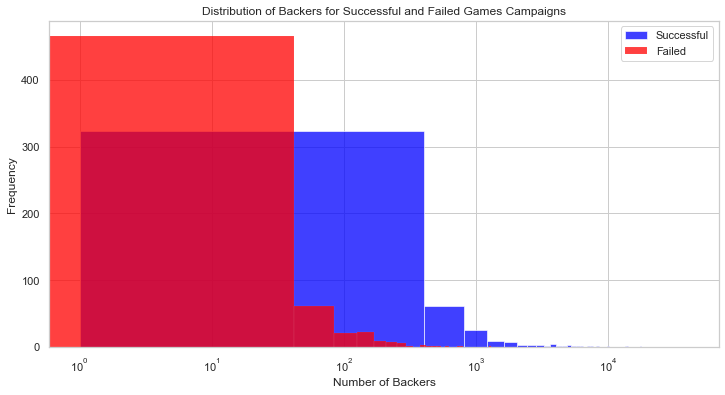

In [77]:
# Filter data for Games category
games_data = df[df['category_id'] == 7]

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the distribution of backers for successful and failed Games campaigns
sns.histplot(games_data[games_data['outcome']=='successful']['backers'], ax=ax, color='blue', bins=100)
sns.histplot(games_data[games_data['outcome']=='failed']['backers'], ax=ax, color='red', bins=100)
ax.set_title('Distribution of Backers for Successful and Failed Games Campaigns')
ax.set_xlabel('Number of Backers')
ax.set_ylabel('Frequency')
ax.set_xscale('log')
ax.legend(['Successful', 'Failed'])

# Show the plot
plt.show()

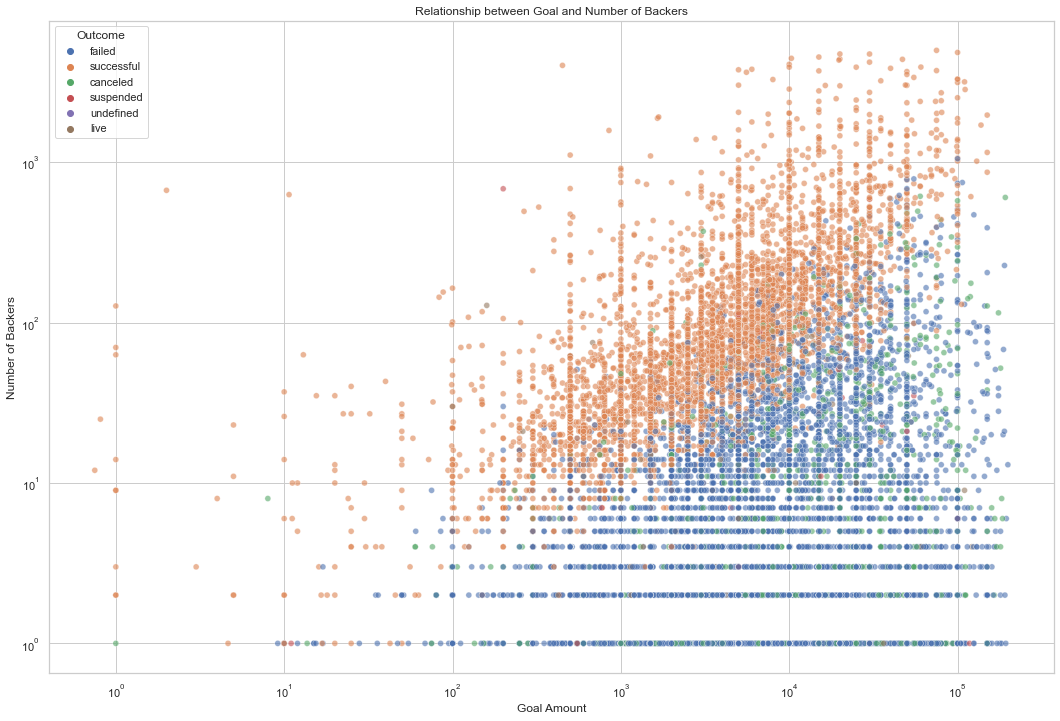

In [80]:
# Filter out extreme values for better visualization
filtered_data = df[(df['backers']<5000) & (df['goal']<200000)]

# Create a scatter plot of goal vs backers
plt.figure(figsize=(18, 12))
sns.scatterplot(data=filtered_data, x='goal', y='backers', hue='outcome', alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Relationship between Goal and Number of Backers')
plt.xlabel('Goal Amount')
plt.ylabel('Number of Backers')
plt.legend(title='Outcome')
plt.show()


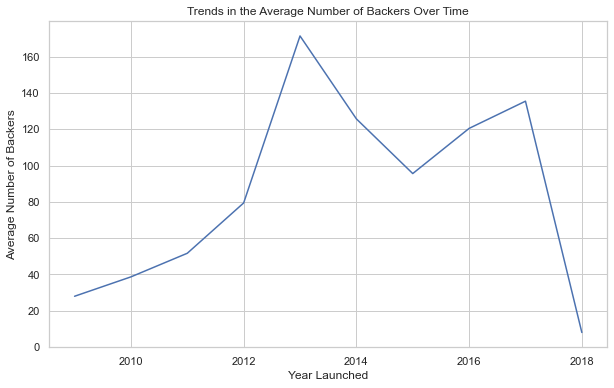

In [81]:
df['launched'] = pd.to_datetime(df['launched'], errors='coerce')


df = df.dropna(subset=['launched'])

# Extract year from 'launched'
df['year_launched'] = df['launched'].dt.year

# Average number of backers over time
avg_backers_by_year = df.groupby('year_launched')['backers'].mean()

# Plot the average number of backers over time
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_backers_by_year.index, y=avg_backers_by_year.values)
plt.title('Trends in the Average Number of Backers Over Time')
plt.xlabel('Year Launched')
plt.ylabel('Average Number of Backers')
plt.show()

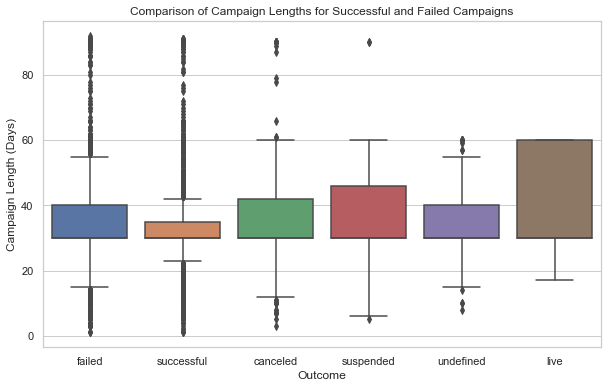

In [83]:
#### Convert 'deadline' to datetime format
df['deadline'] = pd.to_datetime(df['deadline'], errors='coerce')

# Calculate campaign length in days
df['campaign_length'] = (df['deadline'] - df['launched']).dt.days

# Created boxplots to compare campaign lengths for successful and failed campaigns
plt.figure(figsize=(10, 6))
sns.boxplot(x='outcome', y='campaign_length', data=df)
plt.title('Comparison of Campaign Lengths for Successful and Failed Campaigns')
plt.xlabel('Outcome')
plt.ylabel('Campaign Length (Days)')
plt.show()